### Visualization of individual data on map with `folium`, `geoJSON` and `pandas DataFrame`

#### 1. Preparation
##### 1.1. Load `folium`
> official `github` : https://github.com/python-visualization/folium  
> documentation : https://python-visualization.github.io/folium/index.html  
> examples : https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/  
> plugins : https://python-visualization.github.io/folium/plugins.html#folium-plugins  
> * sample 1 : https://dailyheumsi.tistory.com/85?category=815369  
> * sample 2 : https://dailyheumsi.tistory.com/92?category=815369  
  
> contributions : https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/  

In [1]:
import folium

##### 1.2. Function: capture `html` to `png`  
* This case is for `Firefox`.  
```python
browser = webdriver.Firefox()
```  
should be modified according to the browser.  
* Since the size of `html` is too large sometimes, `png` is preferred.  
* Large `html` file exceeds the maximum waiting time for rendering.
  - in this case, edit `browser.set_page_load_timeout(time_in_seconds)` part with larger number

In [2]:
from selenium import webdriver
import time, os

!export PATH="/home/jehyun/PycharmProjects/selenium/:$PATH"

def html2png(m,                     # foium map instance
             html_name,             # str. ex. 'testmap.html'
             png_name='map.png',    # str. ex. 'testmap.png'
             delay=5,               # int or float. ex. 10
             ):

    delay=delay
    fn = 'html/' + html_name
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
    m.save(fn)

    browser = webdriver.Firefox()

    try:
        browser.set_page_load_timeout(600)
        browser.get(tmpurl)
        
    except TimeoutException as ex:
        isrunning = 0
        print("Exception has been thrown. " + str(ex))
        browser.close()

    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot('./images/'+png_name)
    browser.quit()

##### 1.3. Function : `pandas DataFrame` to `markdown`

In [3]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

#### 2. Load Data
##### 2.1. Solar Radiation data on each buildings in Daejeon

In [4]:
df = pd.read_excel('NGL.xlsx')
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df2md(df.head())

(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
1|16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969
2|24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
3|24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
4|24374|0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281


##### 2.2. `JSON` files for Administrative districts

In [5]:
# 'gu' and dong' data in Korea
gu = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_gu_20.json' 
dong = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_dong_20.json' 

###### 2.2.1. Function : Load `JSON` from web

In [6]:
import json
import urllib.request

def read_webjson(url):
  with urllib.request.urlopen(url) as src:
    data = json.loads(src.read().decode(), encoding='utf-8')
    return data 

###### 2.2.2. Load `JSON` from web(gu) and local(dong)

In [7]:
gu_data = read_webjson(gu)    # read 'gu' json from data-snippet

# read 'dong'
# For unknown reason, it is not possible to read from web.
dong_data = json.loads(open('./geojsons/Korea_dong_20.json', 'r', encoding='utf-8').read())

###### 2.2.3. Data Validataion

In [8]:
# Extracting 'gu' data from JSON
gu_dj = {}
gu_dj_value = []
SIG_KOR_NM = []    # list of 'gu's

for key, value in gu_data.items():
  if key != 'features':
    gu_dj.update({key: value})
  else:
    for feature in gu_data['features']:
      properties = feature['properties']
      sig_cd = properties['SIG_CD']
      if sig_cd[:2] == '30':
        SIG_KOR_NM.append(properties['SIG_KOR_NM'])
        gu_dj_value.append(feature)
gu_dj['features'] = gu_dj_value
        
print('# of "gu"s in Daejeon = {}'.format(len(SIG_KOR_NM)))
print(SIG_KOR_NM)        

# save list of 'gu's in json format
with open("gu_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(gu_dj,jsonfile,ensure_ascii=False)

# of "gu"s in Daejeon = 5
['동구', '중구', '서구', '유성구', '대덕구']


In [9]:
import numpy as np

# 1. Grouping 'dong' data from Solar Radiation

df_dong = df.groupby(by='emd_nm').mean().reset_index()

# 2. Extracting 'dong' data from JSON
dong_dj = {}
dong_dj_value = []
EMD_KOR_NM = []    # list of 'dong's

for key, value in dong_data.items():
  if key != 'features':
    dong_dj.update({key: value})
  else:
    for feature in dong_data['features']:
      properties = feature['properties']
      emd_cd = properties['EMD_CD']
      if emd_cd[:2] == '30': # 'dong' filter : only in Daejeon
        EMD_KOR_NM.append(properties['EMD_KOR_NM'])
        dong_dj_value.append(feature)
dong_dj['features'] = dong_dj_value

print('# of "dong"s in Daejeon(JSON) = {}'.format(len(EMD_KOR_NM)))  # Wrong Value : Duplicates exist 
print(sorted(EMD_KOR_NM))  

# 3. Find duplicates - geoJSON compression might have caused geometric split
import collections
print('\nDuplicates are {}'.format([item for item, count in collections.Counter(EMD_KOR_NM).items() if count > 1]))
EMD_KOR_NM = list(np.sort(np.unique(np.array(EMD_KOR_NM))))

print('\n# of  "dong"s in Daejeon(JSON, unique) = {}'.format(len(EMD_KOR_NM)))
print(sorted(EMD_KOR_NM))

# 4. Find missings - data from solar irradiation might have missing data
dong_solar = df_dong['emd_nm'].unique()
missing = []
for dong in EMD_KOR_NM:
  if dong not in dong_solar:
    missing.append(dong)
    
print('\nMissing "dong"s(Solar) = {}'.format(missing))

# 5. Save list of 'dong's in json format, including duplicates,
# because it is not important to treat them at the moment.
with open("dong_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(dong_dj,jsonfile,ensure_ascii=False)

# of "dong"s in Daejeon(JSON) = 177
['가수원동', '가양동', '가오동', '가장동', '가정동', '갈마동', '갈전동', '갑동', '계산동', '관저동', '관평동', '괴곡동', '괴정동', '교촌동', '구도동', '구룡동', '구성동', '구암동', '구완동', '궁동', '금고동', '금동', '금탄동', '낭월동', '내동', '내탑동', '노은동', '대동', '대동', '대별동', '대사동', '대성동', '대정동', '대화동', '대흥동', '덕명동', '덕암동', '덕진동', '도룡동', '도마동', '도안동', '둔곡동', '둔산동', '마산동', '만년동', '매노동', '목달동', '목동', '목상동', '무수동', '문지동', '문창동', '문평동', '문화동', '미호동', '반석동', '방동', '방현동', '법동', '변동', '복수동', '복용동', '봉곡동', '봉명동', '봉산동', '부사동', '부수동', '비래동', '비룡동', '사성동', '사정동', '산성동', '산직동', '삼괴동', '삼성동', '삼정동', '삼정동', '상대동', '상서동', '상소동', '석교동', '석봉동', '선화동', '성남동', '성북동', '세동', '세천동', '소제동', '소호동', '송강동', '송정동', '송촌동', '수남동', '신대동', '신동', '신봉동', '신상동', '신성동', '신안동', '신일동', '신촌동', '신탄진동', '신하동', '신흥동', '안산동', '안영동', '어남동', '어은동', '연축동', '오동', '오동', '오류동', '오정동', '옥계동', '와동', '외삼동', '용계동', '용계동', '용두동', '용문동', '용산동', '용운동', '용전동', '용촌동', '용호동', '우명동', '원내동', '원동', '원신흥동', '원정동', '원촌동', '월평동', '유천동', '은행동', '읍내동', '이사동', '이현동', '인동', '자양동', '자운동

#### 3. Data Visualization
> How to use colormap with `folium` marker plot : https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot  
> Colormap code-snippets : https://stackoverflow.com/questions/52911688/python-folium-choropleth-map-colors-incorrect/52981115#52981115  
> Colormap and other code-snippets : http://incredible.ai/code-snippet/2019/03/16/GeoHash-And-GeoPandas/  
> Color gradient code-snippets : https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python  

##### 3.1. Find Map Center Coordination

In [10]:
# center of the map

lon_avg = df['lon'].mean()
lat_avg = df['lat'].mean()
print(lon_avg, lat_avg)

127.4013580315068 36.340743659590096


##### 3.2. Function : Additive Color Operation 

In [27]:
def add_color(c1, c2, c3, ipol=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    c3=np.array(mpl.colors.to_rgb(c3))
    if ipol < 0.5:
        # if c1 and c2 are parallel
        if np.dot(c1, c2) == np.linalg.norm(c1) * np.linalg.norm(c2):
            c = 2*((0.5-ipol)*c1 + ipol*c2)
        else:
            if ipol < 0.25:
                c = c1 + 4*ipol * c2
            elif ipol < 0.5:
                c = (2 - 4*ipol) * c1 + c2
    else:
        # if c2 and c3 are parallel
        if np.dot(c2, c3) == np.linalg.norm(c2) * np.linalg.norm(c3):
            c = 2*((1-ipol)*c2 + (ipol-0.5)*c3)
        else:
            if ipol < 0.75:
                c = c2 + (4*ipol-2) * c3
            else:
                c = (4 - 4*ipol) * c2 + c3
    
    if c.max() > 1:
        c = c/c.max()
        
    return mpl.colors.to_hex(c)

##### 3.3. Function : Map + Admistrative Districts + Data + Customized Colormap

In [28]:
import branca
import branca.colormap as cm
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def dj_datamap(df,               # pandas DataFrame
               col,              # column to plot in df
               *colors,          # colors for colormap formation : [c1, c2, c3]
               legend = None,    # legend. if None, 'col' is applied.
               datanum = None,   # number of data to plot. if None, all data.
               binmin = None,    # min. value of data to colorize
               binmax = None,    # max. value of data to colorize
               binstep = 5,      # number of bins 
               colortype = 'linear'  # 'linear' or 'step'
              ):
    # filename to be saved
    filename = '{}_{}'.format(col, legend)
    
    # folium map
    m = folium.Map(location=[lat_avg, lon_avg], 
                   tiles='CartoDB positron',
                   zoom_start=11)

    # style function for 'gu'
    style_function_gu = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 1,
                    'color': 'black',
                    'fillColor': 'white'
                    }
    
    # style function for 'dong'
    style_function_dong = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 0,
                    'color': 'gray',
                    'fillColor': 'white'
                    }

    # plot: adminstrative districts 'gu'
    folium.GeoJson(gu_dj, name='gu_dj',
                   style_function=lambda x: style_function_gu        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map
    
    # plot : administrative districts 'dong'
    folium.GeoJson(dong_dj, name='dong_dj',
                   style_function=lambda x: style_function_dong        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map

    # colormap settings
    # - values to colorize
    if binmin == None:
        vmin = df[col].min()
    else:
        vmin = binmin
        
    if binmax == None:    
        vmax = df[col].max()
    else:
        vmax = binmax
    
    # - number of data to plot
    if datanum == None:
        datanum = df.shape[0]
    
    # - colormap configuration
    c1 = colors[0][0]
    c2 = colors[0][1]
    c3 = colors[0][2]
    
    if colortype == 'linear':
        clrmap = cm.LinearColormap(colors=[c1, c2, c3], vmin=vmin, vmax=vmax)
    elif colortype == 'step':
        _colors = []
        for i in range(binstep):
            _colors.append(add_color(c1, c2, c3, i/(binstep-1)))
        
        #- colormap visualization
        bins = np.linspace(vmin, vmax, num=binstep+1)
    
        fig, axes = plt.subplots(figsize=(2,4), nrows=binstep+1, ncols=2, sharex=True)
        for i in range(binstep+1):
            rect = axes[i][0].patch
            rect.set_facecolor(_colors[binstep-i-1])
            if i == binstep:
                rect.set_alpha(0)
            axes[i][0].set_xlabel('')
            axes[i][0].set_ylabel('')
            axes[i][0].set_xticks([])
            axes[i][0].set_yticks([])
            axes[i][0].set_xticklabels([])
            axes[i][0].set_yticklabels([])
            axes[i][0].spines['top'].set_visible(True)
            axes[i][0].spines['right'].set_visible(False)
            axes[i][0].spines['bottom'].set_visible(False)
            axes[i][0].spines['left'].set_visible(False)
        for i in range(binstep+1):
            axes[i][1].text(0.1, 1, '{:d}'.format(int(bins[binstep-i])), transform=axes[i][1].transAxes, fontsize=14, va='top', ha='left')
            axes[i][1].set_xlabel('')
            axes[i][1].set_ylabel('')
            axes[i][1].set_xticks([])
            axes[i][1].set_yticks([])
            axes[i][1].set_xticklabels([])
            axes[i][1].set_yticklabels([])
            axes[i][1].spines['top'].set_visible(False)
            axes[i][1].spines['right'].set_visible(False)
            axes[i][1].spines['bottom'].set_visible(False)
            axes[i][1].spines['left'].set_visible(False)
            
        plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
        #plt.tight_layout()
        plt.savefig('./images/{}_legend.png'.format(filename))
        plt.show()
        
        clrmap = cm.StepColormap(colors=_colors, vmin=vmin, vmax=vmax,
                                index=np.linspace(vmin, vmax, binstep+1))
    
    # plot : data as markers (actually, dots)
    for idx in df.index[:datanum]:
        # Get longitude/latitude
        lon = df.at[idx, 'lon']
        lat = df.at[idx, 'lat']

        data = df.at[idx, col]
       
        folium.CircleMarker(
            location = [lat, lon],
            color='grey',
            fill_color=clrmap(data),
            fill_opacity=1,
            radius=0.5,
            weight=0
        ).add_to(m)
        
    # legend
    if colortype == 'linear':
        clrmap = clrmap.to_step(index=np.linspace(vmin, vmax, num=binstep))
    elif colortype == 'step':
        pass
    
    if legend == None:
        legend = col
    
    clrmap.caption=legend
    clrmap.add_to(m)

    # layer control ON
    folium.LayerControl().add_to(m)
    
    # save as file
    html2png(m, '{}.html'.format(filename), '{}.png'.format(filename))
    
    return _colors

In [119]:
colors = ['#ffff00', '#ffa000', '#ff6000']

#ffff00
#ffd000
#ffa000
#ff8000
#ff6000


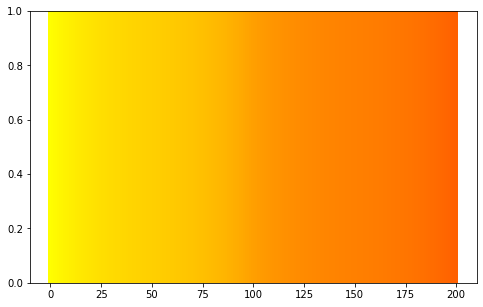

In [120]:
%matplotlib inline

n = 200
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    color = add_color(colors[0],colors[1],colors[2], x/n)
    if x in [0, 50, 100, 150, 200]:
        print(color)
    ax.axvline(x, color=color, linewidth=4) 
plt.show()

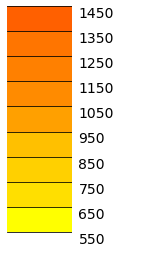

['#ffff00',
 '#ffdf00',
 '#ffd000',
 '#ffc000',
 '#ffa000',
 '#ff8b00',
 '#ff8000',
 '#ff7500',
 '#ff6000']

In [121]:
dj_datamap(df, 'y17', colors, legend='radiation with shadows', datanum=None, binmin=550, binmax=1450, binstep=9, colortype='step')

Note : the `html` file is about 70 MB, where `png` file is only about 640 KB.  

In [123]:
colors = ['deepskyblue', 'blue', 'navy']

#00bfff
#0060ff
#0000ff
#0000c0
#000080


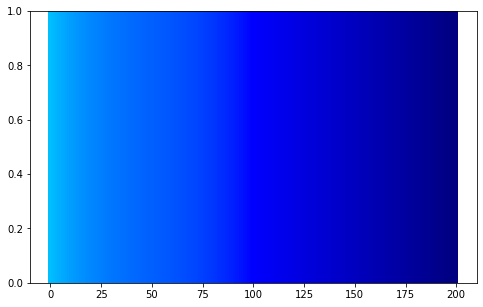

In [124]:
%matplotlib inline

n = 200
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    color = add_color(colors[0],colors[1],colors[2], x/n)
    if x in [0, 50, 100, 150, 200]:
        print(color)
    ax.axvline(x, color=color, linewidth=4) 
plt.show()

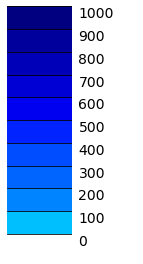

['#00bfff',
 '#0084ff',
 '#0065ff',
 '#004cff',
 '#0023ff',
 '#0000f1',
 '#0000d5',
 '#0000b8',
 '#00009c',
 '#000080']

In [125]:
dj_datamap(df, 'shadow', colors, legend='shadow', datanum=None, binmin=0, binmax=1000, binstep=10, colortype='step')

In [12]:
df['buld_elev'].sort_values(ascending=False)
df = df.loc[df['buld_elev'] < 350]

In [15]:
df['gro_flo_co'].sort_values(ascending=False)
df = df.loc[df['gro_flo_co'] <= 40]
df['gro_flo_co'].sort_values(ascending=False)

60780     40
81842     39
109500    39
23403     36
44697     36
          ..
108967     0
45267      0
132813     0
83990      0
140558     0
Name: gro_flo_co, Length: 147741, dtype: object

In [25]:
df['shadow'] = df['st_y17'] - df['y17']

##### 3.4. Function : Distribution Visualization

In [5]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set(font_scale=1)

import platform
system = platform.system()
print(system)

# -*- coding: UTF-8 -*-
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

if system == 'Windows':
    datapath = os.getcwd() + '\\'
    imagepath = datapath + 'images\\'

    # ttf 폰트 전체개수
    print(len(font_list))
    font_list[:10]

    f = [f.name for f in fm.fontManager.ttflist]
    print(len(font_list))
    f[:10]

    [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

    path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
    font_name = fm.FontProperties(fname=path, size=50).get_name()

    print(font_name)
    plt.rc('font', family=font_name)
  
elif system == 'Linux':
    datapath = os.getcwd() + '//'
    imagepath = datapath + 'images//'

#     !apt-get update -qq
#     !apt-get install fonts-nanum* -qq

    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
    font_name = fm.FontProperties(fname=path, size=10).get_name()

    print(font_name)
    plt.rc('font', family=font_name)

    fm._rebuild()
    mpl.rcParams['axes.unicode_minus'] = False
  
else:
    print('# Sorry, my code has compatibility with Windows and Linux only.')
    exit(0)

Linux
버전:  3.1.1
설치 위치:  /home/jehyun/anaconda3/envs/geocoding/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/jehyun/.config/matplotlib
캐시 위치:  /home/jehyun/.cache/matplotlib
설정 파일 위치:  /home/jehyun/anaconda3/envs/geocoding/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic


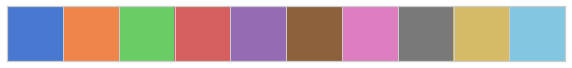

In [6]:
# Figure style setting
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('muted'))
sns.set_context("talk")
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
import numpy as np
def dist_plot(df, xk, xv):

    fig, ax = plt.subplots(figsize=(6,6))
    f = sns.distplot(df[xk], kde=False, rug=False)

    if xv == '건물 넓이':
        f.set(yscale='log')

    mean_val = df[xk].mean()
    std_val = df[xk].std()
    max_val = df[xk].max()
    min_val = df[xk].min()
    
    print('{}: mean= {:.2f}, st.dev.= {:.2f}, min= {:.2f}, max= {:.2f}'.format(xk, mean_val, std_val, min_val, max_val))

#     fig.text(0.3,0.8, '     mean : {:>3.02f}'.format(mean_val), fontsize=16)
#     fig.text(0.3,0.75, '        std : {:>3.02f}'.format(std_val), fontsize=16)
#     fig.text(0.3,0.7, '       max : {:>3.02f}'.format(max_val), fontsize=16)
#     fig.text(0.3,0.65, '       min : {:>3.02f}'.format(min_val), fontsize=16)

    # The most frequent bin
    heights = [h.get_height() for h in f.patches]
    index_max = np.argmax(heights)
#     max_x = f.patches[index_max].get_x() + np.array([0, f.patches[index_max].get_width()/2])
#     fig.text(0.3,0.6, 'max bin : {:>.02f}~{:>.02f}'.format(max_x[0], max_x[1]), fontsize=16, color='blue')
#     f.patches[index_max].set_color('blue')

    f.set(xlabel=xv)
    plt.tight_layout()
    f.figure.savefig('./images/distrib_{}.png'.format(xv))

In [35]:
xs = {
    'gro_flo_co' : '지상 층수',
    'buld_area' : '건물 넓이',
    'buld_elev' : '건물 표고',
    'y17' : '음영반영 일사량',
    'st_y17': '위성일사량',
    'shadow': '음영 기인 일사량 손실'
}

gro_flo_co: mean= 2.22, st.dev.= 2.61, min= 0.00, max= 40.00
buld_area: mean= 186.51, st.dev.= 773.33, min= 0.09, max= 130409.55
buld_elev: mean= 64.72, st.dev.= 24.00, min= 0.00, max= 347.80
y17: mean= 1080.84, st.dev.= 146.16, min= 0.00, max= 1457.28
st_y17: mean= 1445.17, st.dev.= 7.22, min= 1429.47, max= 1482.60
shadow: mean= 364.33, st.dev.= 145.11, min= -0.00, max= 1455.12


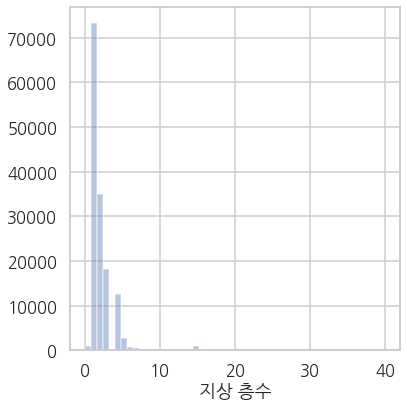

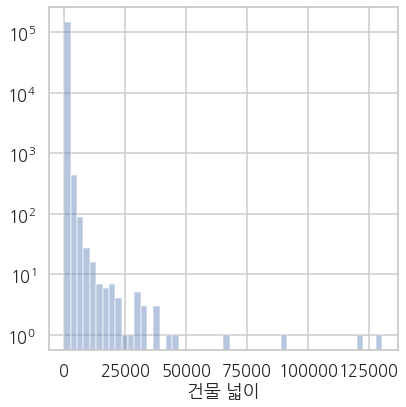

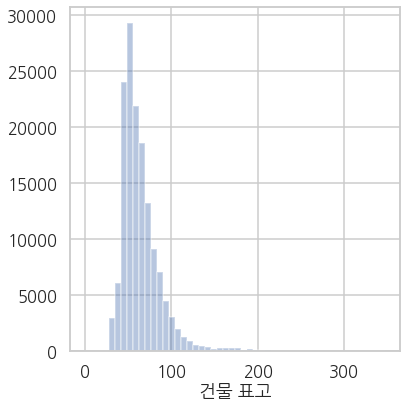

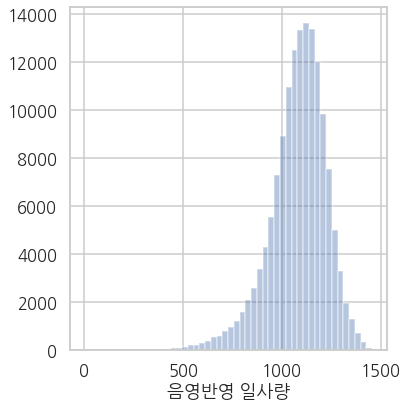

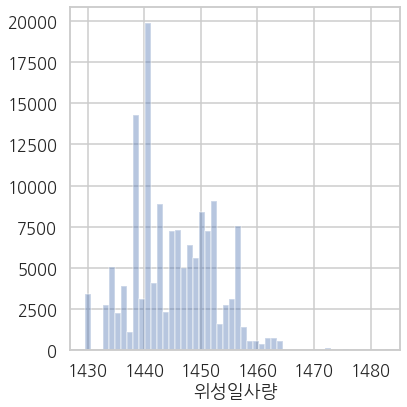

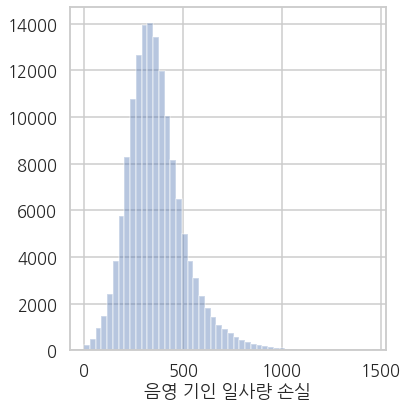

In [36]:
for xk, xv in xs.items():
    dist_plot(df, xk, xv)

In [37]:
flo_1 = df[df['gro_flo_co'] >= 10].shape[0]
print(flo_1)

print(flo_1/147754)

3169
0.021447811903569446


In [149]:
df['gro_flo_co'] = df['gro_flo_co'].astype('int')

In [167]:
df_dong = pd.DataFrame(df.groupby('emd_nm').sum()/df.groupby('emd_nm').count())
df_dong = df_dong.reset_index(drop=False)
df_dong.sort_values(by='gro_flo_co', inplace=True, ascending=False)
df2md(df_dong[['emd_nm', 'gro_flo_co']])

(index)|emd_nm|gro_flo_co
---|---|---
41|둔산동|7.172992056487202
74|상대동|5.718100890207715
57|법동|5.316666666666666
39|도안동|4.95405819295559
148|지족동|4.7233368532206965
10|관평동|4.672991071428571
43|만년동|4.549367088607595
62|봉명동|4.376452362509682
122|원신흥동|4.239350912778905
144|죽동|4.060137457044673
9|관저동|4.042310821806347
125|월평동|3.8424864212432106
8|계산동|3.672176308539945
88|송촌동|3.3854827343199436
5|갈마동|3.330563583815029
26|노은동|3.29375
2|가오동|3.253481894150418
59|복수동|3.2240802675585285
154|탄방동|3.216245883644347
19|궁동|3.1150442477876106
93|신성동|2.9986301369863013
34|덕명동|2.878727634194831
47|목상동|2.841726618705036
116|용전동|2.836824159766196
152|추목동|2.834710743801653
23|낭월동|2.8219484882418815
37|도룡동|2.7635574837310197
156|태평동|2.7474798387096775
114|용산동|2.7291666666666665
103|어은동|2.697947214076246
106|오류동|2.675903614457831
147|중촌동|2.6325301204819276
65|비래동|2.577058409570725
68|사정동|2.535885167464115
78|석봉동|2.514519056261343
86|송강동|2.490084985835694
46|목동|2.4764150943396226
159|하기동|2.4742990654205608
30|대성동|2.4655172413793105
146|중리동|2.4596055979643765
150|천동|2.4551020408163264
79|선화동|2.4190871369294604
163|홍도동|2.401812688821752
127|은행동|2.3708920187793425
131|인동|2.362876254180602
145|중동|2.3496932515337425
115|용운동|2.3403284671532845
138|전민동|2.336829836829837
52|문화동|2.322210987529491
12|괴정동|2.3208955223880596
54|반석동|2.310483870967742
165|효동|2.2757475083056478
132|자양동|2.2448579823702253
33|대흥동|2.2303511705685617
49|문지동|2.206896551724138
157|판암동|2.1771501925545573
13|교촌동|2.1648351648351647
120|원내동|2.1484942886812046
134|장대동|2.1453615777940103
35|덕암동|2.140077821011673
113|용문동|2.124569177744953
112|용두동|2.1176104542626013
1|가양동|2.099722479185939
69|산성동|2.0841983852364474
121|원동|2.0710059171597632
38|도마동|2.0618948824343013
17|구암동|2.0092997811816193
80|성남동|1.989888238424694
27|대동|1.9800488599348534
126|유천동|1.942363112391931
97|신탄진동|1.9275862068965517
63|봉산동|1.9190031152647975
3|가장동|1.8772226926333615
72|삼성동|1.8743550834597875
109|와동|1.8680555555555556
107|오정동|1.8241515002459419
99|신흥동|1.800920598388953
24|내동|1.7912162162162162
139|정동|1.7538726333907058
128|읍내동|1.7516778523489933
56|방현동|1.75
64|부사동|1.7370390165686798
108|옥계동|1.733231707317073
29|대사동|1.7313432835820894
4|가정동|1.7252747252747254
161|학하동|1.7164634146341464
101|안영동|1.7119565217391304
0|가수원동|1.692657077971234
155|탑립동|1.6917808219178083
50|문창동|1.6846846846846846
162|호동|1.675745784695201
140|정림동|1.654320987654321
77|석교동|1.629737609329446
7|갑동|1.6095238095238096
95|신일동|1.5833333333333333
58|변동|1.5784438775510203
32|대화동|1.5670103092783505
51|문평동|1.5188172043010753
16|구성동|1.5081967213114753
133|자운동|1.5060240963855422
91|신봉동|1.4912280701754386
14|구도동|1.48125
75|상서동|1.4321133412042504
104|연축동|1.3941368078175895
89|신대동|1.3789237668161436
60|복용동|1.3644524236983842
111|용계동|1.3276904474002418
158|평촌동|1.3194254445964433
31|대정동|1.3164893617021276
73|삼정동|1.276470588235294
28|대별동|1.2727272727272727
84|소제동|1.2393939393939395
160|하소동|1.2240896358543418
94|신안동|1.2135338345864661
164|화암동|1.1818181818181819
124|원촌동|1.1535087719298245
110|외삼동|1.1362229102167183
76|상소동|1.1222222222222222
129|이사동|1.1217391304347826
53|미호동|1.1209677419354838
135|장동|1.0957446808510638
151|추동|1.0933333333333333
142|주산동|1.0901639344262295
6|갈전동|1.0888888888888888
45|목달동|1.08843537414966
66|비룡동|1.0871369294605808
83|세천동|1.0793269230769231
92|신상동|1.0783410138248848
118|용호동|1.0782608695652174
100|안산동|1.0778210116731517
98|신하동|1.0727272727272728
137|장척동|1.064102564102564
143|주촌동|1.0625
42|마산동|1.0595238095238095
153|침산동|1.0548780487804879
71|삼괴동|1.0545454545454545
87|송정동|1.0541310541310542
82|세동|1.050131926121372
167|흑석동|1.0472589792060492
96|신촌동|1.0441176470588236
18|구완동|1.0441176470588236
102|어남동|1.0431654676258992
130|이현동|1.043103448275862
36|덕진동|1.0425531914893618
48|무수동|1.0340909090909092
85|소호동|1.0333333333333334
21|금동|1.0315789473684212
166|효평동|1.0291666666666666
141|정생동|1.0200803212851406
67|사성동|1.0196078431372548
81|성북동|1.0182555780933062
22|금탄동|1.018181818181818
55|방동|1.0159817351598173
117|용촌동|1.0081967213114753
15|구룡동|1.0075757575757576
11|괴곡동|1.0061919504643964
136|장안동|1.0033222591362125
44|매노동|1.002808988764045
25|내탑동|1.0
40|둔곡동|1.0
90|신동|1.0
20|금고동|1.0
149|직동|0.9908256880733946
70|산직동|0.9901639344262295
123|원정동|0.9845814977973568
61|봉곡동|0.98
105|오동|0.9782608695652174
119|우명동|0.9620253164556962
